# Definição do problema

- Classificação de mulheres com ou sem diabetes



# Etapa 01: Importação das bibliotecas

In [58]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.5.0'

# Etapa 02: Importação dos dados

In [59]:
# Importa dados
df_diabetes = pd.read_csv('/diabetes.csv')

In [60]:
# Visualiza primeiras 5 linhas
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Etapa 03: Visualização da base de dados

In [61]:
positive = df_diabetes[df_diabetes['Outcome'] == 1]
positive

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [62]:
negative = df_diabetes[df_diabetes['Outcome'] == 0]
negative

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


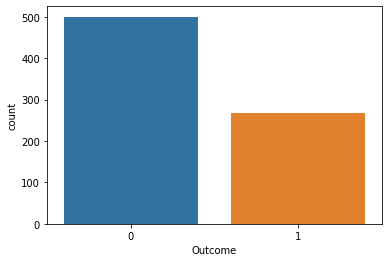

In [63]:
sns.countplot(df_diabetes['Outcome'], label = 'Count');

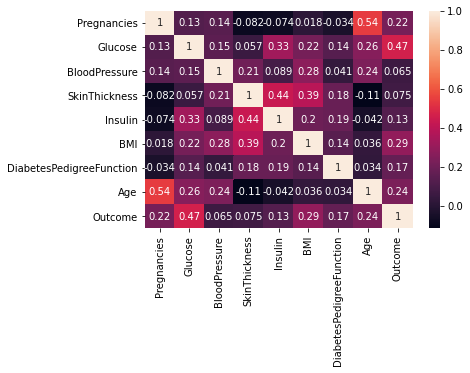

In [64]:
# Avalia a correlação
sns.heatmap(df_diabetes.corr(), annot=True);

# Etapa 04: Limpeza da base de dados

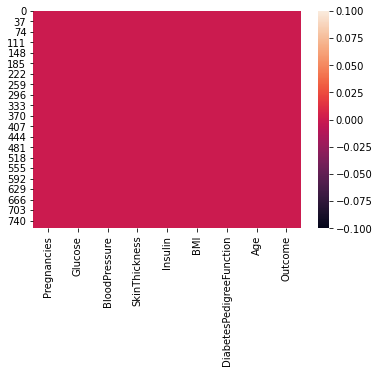

In [65]:
# Verifica se há dados nulos
sns.heatmap(df_diabetes.isnull());

In [67]:
df_diabetes.drop(['BloodPressure', 'SkinThickness'], axis = 1, inplace = True)
df_diabetes

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63,0
764,2,122,0,36.8,0.340,27,0
765,5,121,112,26.2,0.245,30,0
766,1,126,0,30.1,0.349,47,1


# Etapa 05: Construção da base de treinamento e testes

In [68]:
x = df_diabetes.drop(['Outcome'], axis = 1)
x

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63
764,2,122,0,36.8,0.340,27
765,5,121,112,26.2,0.245,30
766,1,126,0,30.1,0.349,47


In [69]:
y = df_diabetes['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [70]:
# Normaliza valores para que fiquem entre 0 e 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [72]:
x_train.shape

(614, 6)

In [73]:
x_test.shape

(154, 6)

# Etapa 06: Construção do modelo

In [89]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units = 1000, activation= 'relu', input_shape=(6,)))
classifier.add(tf.keras.layers.Dense(units = 1000, activation= 'relu'))
classifier.add(tf.keras.layers.Dense(units = 1, activation= 'sigmoid'))
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1000)              7000      
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 1001      
Total params: 1,009,001
Trainable params: 1,009,001
Non-trainable params: 0
_________________________________________________________________


In [90]:
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics='accuracy')

In [91]:
epochs_hist = classifier.fit(x_train, y_train, epochs=500)

Epoch 1/500
20/20 [==============================] - 1s 13ms/step - loss: 0.6538 - accuracy: 0.6547
Epoch 2/500
20/20 [==============================] - 0s 12ms/step - loss: 0.6116 - accuracy: 0.6889
Epoch 3/500
20/20 [==============================] - 0s 13ms/step - loss: 0.5663 - accuracy: 0.6987
Epoch 4/500
20/20 [==============================] - 0s 13ms/step - loss: 0.5469 - accuracy: 0.7068
Epoch 5/500
20/20 [==============================] - 0s 14ms/step - loss: 0.5447 - accuracy: 0.7313
Epoch 6/500
20/20 [==============================] - 0s 12ms/step - loss: 0.5474 - accuracy: 0.7182
Epoch 7/500
20/20 [==============================] - 0s 13ms/step - loss: 0.4950 - accuracy: 0.7557
Epoch 8/500
20/20 [==============================] - 0s 13ms/step - loss: 0.4845 - accuracy: 0.7704
Epoch 9/500
20/20 [==============================] - 0s 13ms/step - loss: 0.4750 - accuracy: 0.7606
Epoch 10/500
20/20 [==============================] - 0s 12ms/step - loss: 0.4818 - accuracy: 0.7687

# Etapa 07: Avaliação do modelo

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
y_pred_train = classifier.predict(x_train)
y_pred_train

array([[2.13801861e-04],
       [2.59558249e-07],
       [9.34348822e-01],
       [9.38811355e-12],
       [5.81389666e-03],
       [2.28199363e-03],
       [1.47412125e-14],
       [9.96905386e-01],
       [1.60753727e-03],
       [5.29204200e-08],
       [2.22474337e-04],
       [6.90728426e-04],
       [2.61977911e-02],
       [9.42659974e-01],
       [3.27351689e-03],
       [3.21235711e-05],
       [2.62584503e-11],
       [2.76243395e-06],
       [3.81396413e-02],
       [9.89429474e-01],
       [2.13028789e-02],
       [2.99182534e-03],
       [3.43716145e-03],
       [2.23845243e-04],
       [1.81079085e-05],
       [4.85185981e-02],
       [4.78994846e-03],
       [1.22746891e-11],
       [4.00334597e-04],
       [9.95903850e-01],
       [3.93372774e-03],
       [1.88188051e-06],
       [8.11427832e-04],
       [7.68721657e-05],
       [9.99998987e-01],
       [2.20653415e-02],
       [1.00593269e-02],
       [6.61819279e-02],
       [1.10640441e-09],
       [2.41315843e-06],


In [94]:
y_pred_train = (y_pred_train > 0.5)
y_pred_train 

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [95]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[400,   0],
       [  0, 214]])

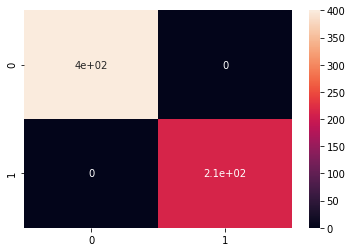

In [96]:
sns.heatmap(cm, annot = True)

In [97]:
y_pred_test = classifier.predict(x_test)
y_pred_test

array([[2.24134328e-06],
       [5.68956733e-02],
       [1.01498117e-05],
       [8.81850898e-01],
       [6.73569104e-07],
       [3.72523123e-10],
       [1.39430523e-01],
       [9.99391317e-01],
       [9.99238193e-01],
       [2.95609236e-04],
       [7.34631419e-01],
       [9.77754593e-04],
       [1.00000000e+00],
       [7.56889820e-01],
       [8.70785415e-02],
       [1.58993810e-01],
       [6.77325204e-07],
       [9.99997795e-01],
       [1.01721316e-08],
       [5.70074240e-12],
       [1.59350038e-03],
       [4.79911059e-01],
       [1.88871093e-06],
       [8.17704439e-01],
       [6.06730595e-13],
       [2.38435291e-06],
       [9.93615150e-01],
       [2.90101767e-03],
       [1.75393527e-13],
       [9.99994934e-01],
       [2.59848393e-10],
       [3.22076678e-03],
       [9.95860219e-01],
       [6.85377980e-16],
       [5.65296412e-03],
       [1.14078820e-02],
       [1.18467212e-03],
       [9.36259031e-01],
       [8.37248564e-03],
       [1.82300507e-12],


In [98]:
y_pred_test = (y_pred_test > 0.5)
y_pred_test 

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [

In [99]:
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[77, 23],
       [21, 33]])

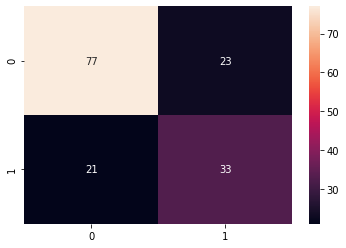

In [100]:
sns.heatmap(cm_test, annot = True)

In [101]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0, 0.5, 'Training loss')

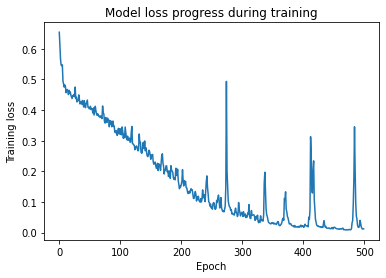

In [102]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')

Text(0, 0.5, 'Training accuracy')

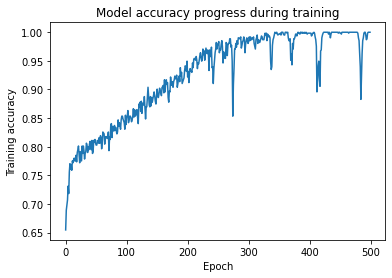

In [103]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')